In [1]:
import re
import io

from datetime import datetime
begin = datetime.now()
start=datetime.now()

#General libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
from sklearn import preprocessing

#For Logisitic Regression implementation
from sklearn.linear_model import LogisticRegression

#For Decision Tree implementation
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#For Random Forest implementation
from sklearn.ensemble import RandomForestClassifier

#For Bagging implementation
from sklearn.ensemble import BaggingClassifier

#For AdaBoost implementation
from sklearn.ensemble import AdaBoostClassifier

# For Naive Bayes
from sklearn.naive_bayes import GaussianNB

#For Stacking
from sklearn.ensemble import StackingClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn import svm

# For SVM
from sklearn.svm import LinearSVC, SVC

# For MLP Classifier
from sklearn.neural_network import MLPClassifier

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

from sklearn.model_selection import GridSearchCV

#Settings
#matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
# np.set_printoptions(threshold=np.nan)
# sns.set()

#from google.colab import files

import warnings
warnings.filterwarnings('ignore')

import random

# Set random seed for the Python environment
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

## Reading the file

In [2]:
df = pd.read_csv('./Datasets/loan_default_latest_ver.csv')

In [3]:
df

,loan_limit,approv_in_adv,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,...,age_35-44,age_45-54,age_55-64,age_65-74,under_25,over_74,North,North-East,central,south
0,0,0,0,0,1,116500,4.05,0.44,3225.00,360.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,0,0,0,0,0,206500,4.05,0.44,3225.00,360.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,0,1,0,0,1,406500,4.56,0.20,595.00,360.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,0,0,0,0,1,456500,4.25,0.68,3225.00,360.00,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
4,0,1,0,0,1,696500,4.00,0.30,0.00,360.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,0,0,0,0,1,436500,3.12,0.26,9960.00,180.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
148666,0,0,0,0,1,586500,5.19,0.85,0.00,360.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
148667,0,0,0,0,1,446500,3.12,0.08,1226.64,180.00,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
148668,0,0,0,0,1,196500,3.50,0.58,4323.33,180.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


## Dimension Reduction

### Method 1 : PCA

In [4]:
# X = df.drop('status', axis=1)
# y = df['status']

# # Standardize features
# scaler = StandardScaler()
# X_norm = scaler.fit_transform(X)

# # Apply PCA
# pca = PCA(n_components=None)
# pca.fit(X_norm)

# # Print eigenvalues and explained variances
# print("Eigenvalues:")
# print(pca.explained_variance_)
# print()

# print("Explained variances (percentage):")
# print(pca.explained_variance_ratio_ * 100)
# print()

# # Make scree plot
# plt.plot(pca.explained_variance_ratio_ * 100, 'o-')
# plt.xlabel("Number of components (Dimensions)")
# plt.ylabel("Explained variance (%)")
# plt.title("Scree Plot")
# plt.show()

# # Determine number of principal components to retain
# num_components = np.sum(pca.explained_variance_ > 1)
# print("Number of principal components to retain based on Kaiser's criterion:", num_components)

### Method 2: PCA using SVD (Chose this) 

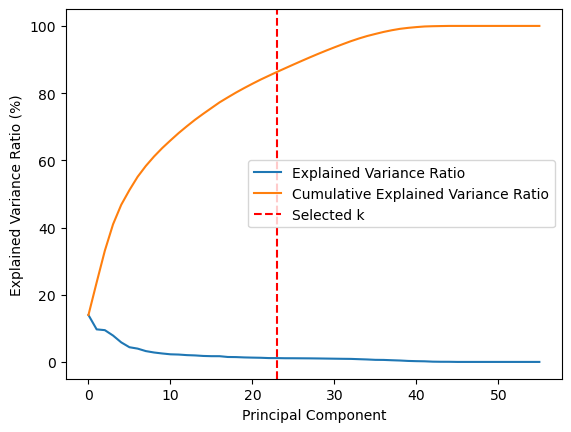


The smallest number of principal components such that the cumulative explained variance is at least 0.85: 23


In [5]:
# Using SVD to compute the principal components of a dataset 

X = df.drop('status', axis=1)
y = df['status']

# Standardize the data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Compute the covariance matrix (a matrix that summarizes the covariances between pairs of variables - e.g. if two variables increase or decrease together.then they have a positive covariance)
covariance_matrix = np.cov(X_norm, rowvar=False)

# Compute the SVD (decomposes a matrix into three matrices)
# U - These vectors are the directions that capture the maximum amount of variance in the data 
# Sigma - These values represent the amount of variance captured by each principal components
# Vt - These vectors also represent the directions in the data space 
# These matrices can be used to calculate the principal components 
U, Sigma, Vt = np.linalg.svd(covariance_matrix)

# Compute the cumulative explained variance
explained_variance_ratio = Sigma ** 2 / np.sum(Sigma ** 2)
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Select the smallest k such that the cumulative explained variance is at least 0.85
k = np.argmax(cumulative_explained_variance_ratio >= 0.85) + 1

# Plot the explained variance ratio and cumulative explained variance ratio
plt.plot(explained_variance_ratio*100, label='Explained Variance Ratio')
plt.plot(cumulative_explained_variance_ratio*100, label='Cumulative Explained Variance Ratio')
plt.axvline(x=k, linestyle='--', color='r', label='Selected k')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio (%)')
plt.legend()
plt.show()

print("\nThe smallest number of principal components such that the cumulative explained variance is at least 0.85:", k)

In [6]:
# Perform PCA

# Fit PCA with chosen number of components
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_norm)

## Train-Test Split

In [7]:
# Split data into training and test sets
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

## Logistic Regression

In [7]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_norm, y_train)

y_pred = logreg.predict(X_test_norm)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.sample(10)

,Actual,Predicted
30922,0,0
107209,0,0
73799,0,0
142036,1,0
81194,0,0
68658,0,0
47504,0,0
6940,0,0
134514,0,0
97203,0,0


Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     22494
           1       0.91      0.47      0.62      7240

    accuracy                           0.86     29734
   macro avg       0.88      0.73      0.77     29734
weighted avg       0.87      0.86      0.84     29734

Confusion Matrix: 
[[22163   331]
 [ 3852  3388]]
Accuracy:  0.8593192977735925
Precision:  0.9109975799946222
Recall:  0.46795580110497237
F1:  0.6183045898348388
Time taken:  0:00:10.931453


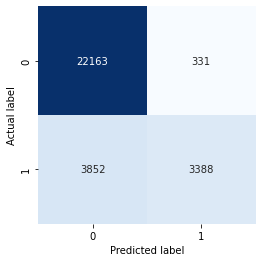

In [8]:
matrix = confusion_matrix(y_test,y_pred)

labels = [0, 1]

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Classification Report: ")
print(report)

print("Confusion Matrix: ")
print(matrix)

print("Accuracy: ", accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ",f1)
print('Time taken: ', datetime.now()-start)

### Evaluation Performance 

In [9]:
# Evaluate performance on the training set
y_train_pred = logreg.predict(X_train_norm)
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate performance on the test set
y_test_pred = logreg.predict(X_test_norm)
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the performance metrics
print("Training accuracy: ", train_acc)
print("Training precision: ", train_prec)
print("Training recall: ", train_rec)
print("Training f1: ", train_f1)
print("Test accuracy: ", test_acc)
print("Test precision: ", test_prec)
print("Test recall: ", test_rec)
print("Test f1: ", test_f1)

Training accuracy:  0.858327167552297
Training precision:  0.9091620476035214
Training recall:  0.47423381747678495
Training f1:  0.6233290114901419
Test accuracy:  0.8593192977735925
Test precision:  0.9109975799946222
Test recall:  0.46795580110497237
Test f1:  0.6183045898348388


# Logistic Regression (GridSearchCV)

Classification Report (GridSearchCV): 
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     22494
           1       0.92      0.47      0.62      7240

    accuracy                           0.86     29734
   macro avg       0.89      0.73      0.77     29734
weighted avg       0.87      0.86      0.84     29734

Best hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy:  0.8600255599650232
Precision:  0.9207217058501913
Recall:  0.46519337016574586
F1:  0.6180950633143696
Time taken:  0:00:13.308848


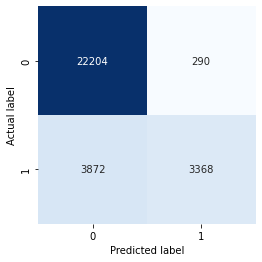

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
#For Logisitic Regression implementation
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

clf = GridSearchCV(logistic_regression, param_grid=param_grid, scoring="accuracy", cv=3)

clf.fit(X_train_norm, y_train)

y_pred = clf.predict(X_test_norm)

matrix = confusion_matrix(y_test,y_pred)

labels = [0, 1]

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Classification Report (GridSearchCV): ")
print(report)

print("Best hyperparameters: ", clf.best_params_)

print("Accuracy: ", accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ",f1)
print('Time taken: ', datetime.now()-start)


### Evaluate Peformance (GridSearchCV)

In [11]:
# Evaluate performance on the training set
y_train_pred = clf.predict(X_train_norm)
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate performance on the test set
y_test_pred = clf.predict(X_test_norm)
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the performance metrics
print("Training accuracy: ", train_acc)
print("Training precision: ", train_prec)
print("Training recall: ", train_rec)
print("Training f1: ", train_f1)
print("Test accuracy: ", test_acc)
print("Test precision: ", test_prec)
print("Test recall: ", test_rec)
print("Test f1: ", test_f1)

Training accuracy:  0.8587307459474003
Training precision:  0.9164297520661157
Training recall:  0.47147862172182725
Training f1:  0.6226304914203575
Test accuracy:  0.8600255599650232
Test precision:  0.9207217058501913
Test recall:  0.46519337016574586
Test f1:  0.6180950633143696


## Naive Bayes

In [12]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_norm , y_train)

#Use the trained model to predict the test data
y_pred = naive_bayes.predict(X_test_norm)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.sample(10)

,Actual,Predicted
61935,0,0
56629,0,0
57767,1,1
13723,1,0
60907,0,0
131589,0,0
67718,0,0
24283,1,1
8683,0,0
133091,0,0


Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     22494
           1       0.71      0.44      0.55      7240

    accuracy                           0.82     29734
   macro avg       0.78      0.69      0.72     29734
weighted avg       0.81      0.82      0.81     29734

Confusion Matrix: 
[[21189  1305]
 [ 4026  3214]]
Accuracy:  0.8207102979753818
Precision:  0.7112192963044921
Recall:  0.4439226519337017
F1:  0.5466451228845991
Time taken:  0:00:13.711079


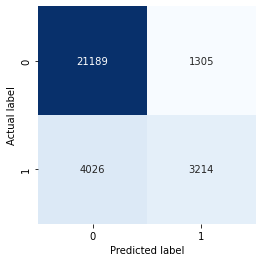

In [13]:
matrix = confusion_matrix(y_test,y_pred)

labels = [0, 1]

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Classification Report: ")
print(report)

print("Confusion Matrix: ")
print(matrix)

print("Accuracy: ", accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ",f1)
print('Time taken: ', datetime.now()-start)

### Evaluate Peformance

In [14]:
# Evaluate performance on the training set
y_train_pred = naive_bayes.predict(X_train_norm)
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate performance on the test set
y_test_pred = naive_bayes.predict(X_test_norm)
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the performance metrics
print("Training accuracy: ", train_acc)
print("Training precision: ", train_prec)
print("Training recall: ", train_rec)
print("Training f1: ", train_f1)
print("Test accuracy: ", test_acc)
print("Test precision: ", test_prec)
print("Test recall: ", test_rec)
print("Test f1: ", test_f1)

Training accuracy:  0.8212399946189547
Training precision:  0.7224956255468067
Training recall:  0.4494370556821661
Training f1:  0.554155220500346
Test accuracy:  0.8207102979753818
Test precision:  0.7112192963044921
Test recall:  0.4439226519337017
Test f1:  0.5466451228845991


# Naive Bayes (GridSearchCV)

Classification Report (GridSearchCV): 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     22494
           1       0.71      0.44      0.55      7240

    accuracy                           0.82     29734
   macro avg       0.78      0.69      0.72     29734
weighted avg       0.81      0.82      0.81     29734

Best hyperparameters:  {'var_smoothing': 1e-06}
Confusion Matrix: 
[[21189  1305]
 [ 4026  3214]]
Accuracy:  0.8207102979753818
Precision:  0.7112192963044921
Recall:  0.4439226519337017
F1:  0.5466451228845991
Time taken:  0:00:14.969539


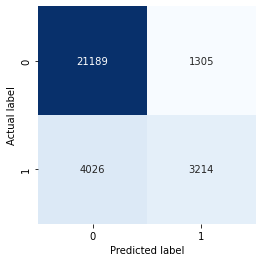

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

clf = GridSearchCV(naive_bayes, param_grid=param_grid, scoring="accuracy", cv=3)

clf.fit(X_train_norm, y_train)

y_pred = clf.predict(X_test_norm)

matrix = confusion_matrix(y_test,y_pred)

labels = [0, 1]

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Classification Report (GridSearchCV): ")
print(report)

print("Best hyperparameters: ", clf.best_params_)

print("Confusion Matrix: ")
print(matrix)

print("Accuracy: ", accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ", f1)
print('Time taken: ', datetime.now()-start)

### Evaluate Peformance (GridSearchCV)

In [16]:
# Evaluate performance on the training set
y_train_pred = clf.predict(X_train_norm)
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate performance on the test set
y_test_pred = clf.predict(X_test_norm)
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the performance metrics
print("Training accuracy: ", train_acc)
print("Training precision: ", train_prec)
print("Training recall: ", train_rec)
print("Training f1: ", train_f1)
print("Test accuracy: ", test_acc)
print("Test precision: ", test_prec)
print("Test recall: ", test_rec)
print("Test f1: ", test_f1)

Training accuracy:  0.8212399946189547
Training precision:  0.7224956255468067
Training recall:  0.4494370556821661
Training f1:  0.554155220500346
Test accuracy:  0.8207102979753818
Test precision:  0.7112192963044921
Test recall:  0.4439226519337017
Test f1:  0.5466451228845991


## Support Vector Machine

In [17]:
svm = LinearSVC(random_state=42)

#Fit the training feature Xs and training label Ys
svm.fit(X_train_norm, y_train)

#Use the trained model to predict the test data
predictions = svm.predict(X_test_norm)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10)

,Actual,Predicted
53714,0,0
140238,0,0
85752,0,0
108766,0,0
111588,0,0
127350,0,0
25974,0,0
13073,0,0
81003,1,1
46740,0,0


Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     22494
           1       0.94      0.46      0.62      7240

    accuracy                           0.86     29734
   macro avg       0.89      0.72      0.77     29734
weighted avg       0.87      0.86      0.84     29734

Confusion Matrix: 
[[22268   226]
 [ 3914  3326]]
Accuracy:  0.8607654536893792
Precision:  0.9363738738738738
Recall:  0.4593922651933702
F1:  0.6163825055596739
Time taken:  1:02:54.977231


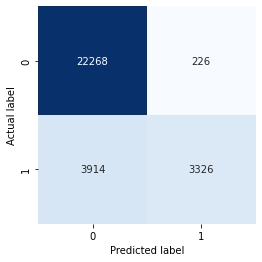

In [18]:
svm_confusion_matrix = confusion_matrix(y_test,predictions)

labels = [0, 1]

sns.heatmap(svm_confusion_matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

svm_classification_report = classification_report(y_test,predictions)
svm_accuracy = accuracy_score(y_test,predictions)
svm_precision = precision_score(y_test,predictions)
svm_recall = recall_score(y_test,predictions)
svm_f1 = f1_score(y_test,predictions)

print("Classification Report: ")
print(svm_classification_report)

print("Confusion Matrix: ")
print(svm_confusion_matrix)

print("Accuracy: ", svm_accuracy)
print("Precision: ",svm_precision)
print("Recall: ",svm_recall)
print("F1: ",svm_f1)
print('Time taken: ', datetime.now()-start)

### Evaluation Performance

In [19]:
# Evaluate performance on the training set
y_train_pred = svm.predict(X_train_norm)
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate performance on the test set
y_test_pred = svm.predict(X_test_norm)
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the performance metrics
print("Training accuracy: ", train_acc)
print("Training precision: ", train_prec)
print("Training recall: ", train_rec)
print("Training f1: ", train_f1)
print("Test accuracy: ", test_acc)
print("Test precision: ", test_prec)
print("Test recall: ", test_rec)
print("Test f1: ", test_f1)

Training accuracy:  0.8590418376269591
Training precision:  0.9300789760348583
Training recall:  0.46467566924045034
Training f1:  0.6197291718647221
Test accuracy:  0.8607654536893792
Test precision:  0.9363738738738738
Test recall:  0.4593922651933702
Test f1:  0.6163825055596739


# SVM (GridSearchCV)

### Sample of the data

In [20]:
random_subset = df.sample(n=10000, random_state=42)
random_subset.head()

,loan_limit,approv_in_adv,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,...,age_35-44,age_45-54,age_55-64,age_65-74,under_25,over_74,North,North-East,central,south
24912,0,0,0,0,0,116500,4.99,1.45,2463.12,360.00,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
147068,0,1,0,0,1,236500,3.99,0.44,2517.59,360.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
123284,0,0,0,0,1,136500,3.99,0.45,3900.00,348.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
53610,0,0,0,0,1,256500,4.25,0.62,3437.50,180.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
39672,0,0,0,0,1,686500,3.38,-0.22,0.00,360.00,...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [21]:
X = random_subset.drop('status', axis=1)
y = random_subset['status']

X_ori = X
X_norm = standardScaler.fit_transform(X)

# Normalized data
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_norm, y, test_size=0.20, random_state=42, stratify=y)

Classification Report (GridSearchCV): 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1527
           1       0.92      0.75      0.83       473

    accuracy                           0.93      2000
   macro avg       0.92      0.86      0.89      2000
weighted avg       0.92      0.93      0.92      2000

Best hyperparameters:  {'C': 10, 'gamma': 0.01}
Accuracy:  0.925
Precision:  0.917312661498708
Recall:  0.7505285412262156
F1:  0.8255813953488372
Time taken:  0:06:05.517613


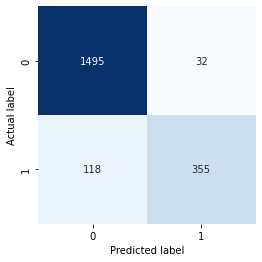

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score

svc = SVC(kernel="rbf")
ranges = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
param_grid = {"C":ranges, "gamma":ranges}

clf = GridSearchCV(svc, param_grid=param_grid, scoring="accuracy", cv=3)

clf.fit(X_train_svm, y_train_svm)

y_pred = clf.predict(X_test_svm)

svm_confusion_matrix = confusion_matrix(y_test_svm,y_pred)

labels = [0, 1]

sns.heatmap(svm_confusion_matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

svm_classification_report = classification_report(y_test_svm,y_pred)
svm_accuracy = accuracy_score(y_test_svm,y_pred)
svm_precision = precision_score(y_test_svm,y_pred)
svm_recall = recall_score(y_test_svm,y_pred)
svm_f1 = f1_score(y_test_svm,y_pred)

print("Classification Report (GridSearchCV): ")
print(svm_classification_report)

print("Best hyperparameters: ", clf.best_params_)

print("Accuracy: ", svm_accuracy)
print("Precision: ",svm_precision)
print("Recall: ",svm_recall)
print("F1: ",svm_f1)
print('Time taken: ', datetime.now()-start)

### Evaluation Performance (GridSearchCV)

In [23]:
from sklearn.svm import LinearSVC, SVC
# Evaluate performance on the training set
y_train_pred = clf.predict(X_train_svm)
train_acc = accuracy_score(y_train_svm, y_train_pred)
train_prec = precision_score(y_train_svm, y_train_pred)
train_rec = recall_score(y_train_svm, y_train_pred)
train_f1 = f1_score(y_train_svm, y_train_pred)

# Evaluate performance on the test set
y_test_pred = clf.predict(X_test_svm)
test_acc = accuracy_score(y_test_svm, y_test_pred)
test_prec = precision_score(y_test_svm, y_test_pred)
test_rec = recall_score(y_test_svm, y_test_pred)
test_f1 = f1_score(y_test_svm, y_test_pred)

# Print the performance metrics
print("Training accuracy: ", train_acc)
print("Training precision: ", train_prec)
print("Training recall: ", train_rec)
print("Training f1: ", train_f1)
print("Test accuracy: ", test_acc)
print("Test precision: ", test_prec)
print("Test recall: ", test_rec)
print("Test f1: ", test_f1)

Training accuracy:  0.962875
Training precision:  0.9860012172854534
Training recall:  0.8553326293558606
Training f1:  0.916030534351145
Test accuracy:  0.925
Test precision:  0.917312661498708
Test recall:  0.7505285412262156
Test f1:  0.8255813953488372


## Decision Tree

In [24]:
model=DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train_norm,y_train)

y_pred=model.predict(X_test_norm)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.sample(10)

,Actual,Predicted
56752,1,1
2047,0,0
10627,1,1
44465,0,0
38251,0,0
131406,0,0
17389,0,0
109651,0,0
140939,0,0
137740,0,0


Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     22494
           1       0.65      0.67      0.66      7240

    accuracy                           0.83     29734
   macro avg       0.77      0.78      0.77     29734
weighted avg       0.83      0.83      0.83     29734

Confusion Matrix: 
[[19914  2580]
 [ 2393  4847]]
Accuracy:  0.8327503867626287
Precision:  0.6526188232126027
Recall:  0.6694751381215469
F1:  0.660939524101725
Time taken:  0:06:14.064834


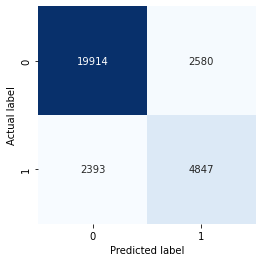

In [25]:
matrix = confusion_matrix(y_test,y_pred)

labels = [0, 1]

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Classification Report: ")
print(report)

print("Confusion Matrix: ")
print(matrix)

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ", f1)
print('Time taken: ', datetime.now()-start)

### Evaluating performance

In [26]:
# Evaluate performance on the training set
y_train_pred = model.predict(X_train_norm)
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate performance on the test set
y_test_pred = model.predict(X_test_norm)
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the performance metrics
print("Training accuracy: ", train_acc)
print("Training precision: ", train_prec)
print("Training recall: ", train_rec)
print("Training f1: ", train_f1)
print("Test accuracy: ", test_acc)
print("Test precision: ", test_prec)
print("Test recall: ", test_rec)
print("Test f1: ", test_f1)

Training accuracy:  1.0
Training precision:  1.0
Training recall:  1.0
Training f1:  1.0
Test accuracy:  0.8327503867626287
Test precision:  0.6526188232126027
Test recall:  0.6694751381215469
Test f1:  0.660939524101725


## Decision Tree (GridSearchCV)

In [27]:
# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'max_depth': [2, 8],
    'min_samples_split': [2, 8],
    'min_samples_leaf': [1, 4],
    'criterion': ['gini', 'entropy']
}

# Create the GridSearchCV object
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_dt.fit(X_train_norm, y_train)

# Get the best model from the GridSearchCV object
best_model_dt = grid_search_dt.best_estimator_

# Get the best set of params
print("\n The best parameters across ALL searched params:\n",grid_search_dt.best_params_)

# Make predictions on the test data
y_pred = best_model_dt.predict(X_test_norm)


 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     22494
           1       0.88      0.45      0.60      7240

    accuracy                           0.85     29734
   macro avg       0.86      0.72      0.75     29734
weighted avg       0.86      0.85      0.83     29734

Confusion Matrix: 
[[22038   456]
 [ 3961  3279]]
Accuracy:  0.8514495190690792
Precision:  0.8779116465863454
Recall:  0.4529005524861878
F1:  0.5975398633257403
Time taken:  0:06:42.959685


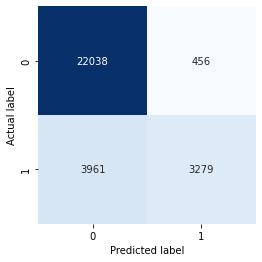

In [28]:
matrix = confusion_matrix(y_test,y_pred)

labels = [0, 1]

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Classification Report: ")
print(report)

print("Confusion Matrix: ")
print(matrix)

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ", f1)
print('Time taken: ', datetime.now()-start)

### Evaluating performance (GridSearchCV)

In [29]:
# Evaluate performance on the training set
y_train_pred = best_model_dt.predict(X_train_norm)
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate performance on the test set
y_test_pred = best_model_dt.predict(X_test_norm)
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the performance metrics
print("Training accuracy: ", train_acc)
print("Training precision: ", train_prec)
print("Training recall: ", train_rec)
print("Training f1: ", train_f1)
print("Test accuracy: ", test_acc)
print("Test precision: ", test_prec)
print("Test recall: ", test_rec)
print("Test f1: ", test_f1)

Training accuracy:  0.8563260913432434
Training precision:  0.9068138259202961
Training recall:  0.4667165549848634
Training f1:  0.6162587019986526
Test accuracy:  0.8514495190690792
Test precision:  0.8779116465863454
Test recall:  0.4529005524861878
Test f1:  0.5975398633257403


## Random Forest

In [30]:
model=RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, criterion='entropy')
model.fit(X_train_norm,y_train)

y_pred = model.predict(X_test_norm)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.sample(10)

,Actual,Predicted
52206,1,0
10163,0,0
77138,1,1
106050,1,0
4248,1,1
60626,0,0
95759,0,0
19581,0,0
129133,0,0
119495,1,0


Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     22494
           1       0.93      0.56      0.70      7240

    accuracy                           0.88     29734
   macro avg       0.90      0.77      0.81     29734
weighted avg       0.89      0.88      0.87     29734

Confusion Matrix: 
[[22199   295]
 [ 3168  4072]]
Accuracy:  0.8835340014797874
Precision:  0.9324479047400962
Recall:  0.5624309392265193
F1:  0.7016455587145688
Time taken:  0:07:00.132605


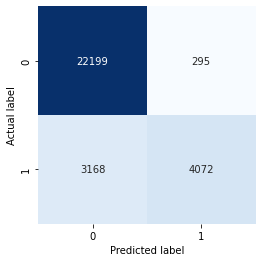

In [31]:
matrix = confusion_matrix(y_test,y_pred)

labels = [0, 1]

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Classification Report: ")
print(report)

print("Confusion Matrix: ")
print(matrix)

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ", f1)
print('Time taken: ', datetime.now()-start)

### Evaluating performance

In [32]:
# Evaluate performance on the training set
y_train_pred = model.predict(X_train_norm)
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate performance on the test set
y_test_pred = model.predict(X_test_norm)
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the performance metrics
print("Training accuracy: ", train_acc)
print("Training precision: ", train_prec)
print("Training recall: ", train_rec)
print("Training f1: ", train_f1)
print("Test accuracy: ", test_acc)
print("Test precision: ", test_prec)
print("Test recall: ", test_rec)
print("Test f1: ", test_f1)

Training accuracy:  1.0
Training precision:  1.0
Training recall:  1.0
Training f1:  1.0
Test accuracy:  0.8835340014797874
Test precision:  0.9324479047400962
Test recall:  0.5624309392265193
Test f1:  0.7016455587145688


## Random Forest (GridSearchCV)

In [9]:
# Create a random forest classifier
rf = RandomForestClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 8]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_norm, y_train)

# Get the best model from the GridSearchCV object
best_model_rf = grid_search.best_estimator_

# Get the best set of params
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

# Use the best model to make predictions on the test set
y_pred = best_model_rf.predict(X_test_norm)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.sample(10)


 The best parameters across ALL searched params:
 {'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 50}


,Actual,Predicted
40997,1,1
6610,0,0
1150,1,1
86681,1,0
111649,0,0
65028,0,0
137856,0,0
10615,0,0
74506,1,1
74662,0,0


Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     22494
           1       0.96      0.44      0.61      7240

    accuracy                           0.86     29734
   macro avg       0.91      0.72      0.76     29734
weighted avg       0.88      0.86      0.84     29734

Confusion Matrix: 
[[22377   117]
 [ 4022  3218]]
Accuracy:  0.8607990852223044
Precision:  0.9649175412293853
Recall:  0.444475138121547
F1:  0.6086052009456265
Time taken:  0:11:27.344929


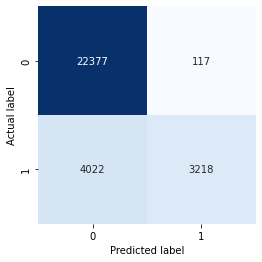

In [10]:
matrix = confusion_matrix(y_test,y_pred)

labels = [0, 1]

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Classification Report: ")
print(report)

print("Confusion Matrix: ")
print(matrix)

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ", f1)
print('Time taken: ', datetime.now()-start)

### Evaluating performance (GridSearchCV)

In [11]:
# Evaluate performance on the training set
y_train_pred = best_model_rf.predict(X_train_norm)
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate performance on the test set
y_test_pred = best_model_rf.predict(X_test_norm)
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the performance metrics
print("Training accuracy: ", train_acc)
print("Training precision: ", train_prec)
print("Training recall: ", train_rec)
print("Training f1: ", train_f1)
print("Test accuracy: ", test_acc)
print("Test precision: ", test_prec)
print("Test recall: ", test_rec)
print("Test f1: ", test_f1)

Training accuracy:  0.8616650971951302
Training precision:  0.9711748434997817
Training recall:  0.45382496003265416
Training f1:  0.618587291652178
Test accuracy:  0.8607990852223044
Test precision:  0.9649175412293853
Test recall:  0.444475138121547
Test f1:  0.6086052009456265


## Multilayer Perceptron

### MLP Classifier

In [26]:
clf = MLPClassifier(hidden_layer_sizes=(20,10,5),activation="relu").fit(X_train_norm, y_train)
y_pred=clf.predict(X_test_norm)
print(clf.score(X_test_norm, y_test))

In [28]:
matrix = confusion_matrix(y_test,y_pred)

labels = [0, 1]

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Classification Report: ")
print(report)

print("Confusion Matrix: ")
print(matrix)

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ", f1)
print('Time taken: ', datetime.now()-start)

In [29]:
y_pred=clf.predict(X_train_norm)

matrix = confusion_matrix(y_train,y_pred)

labels = [0, 1]

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

report = classification_report(y_train,y_pred)
accuracy = accuracy_score(y_train,y_pred)
precision = precision_score(y_train,y_pred)
recall = recall_score(y_train,y_pred)
f1 = f1_score(y_train,y_pred)

print("Classification Report: ")
print(report)

print("Confusion Matrix: ")
print(matrix)

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ", f1)
print('Time taken: ', datetime.now()-start)

## MLP - with GridSearchCV (hyperparameter tuning)

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create an MLP classifier and fit it to the training data
clf = MLPClassifier(hidden_layer_sizes=(5,10,20),max_iter=1000, random_state=42)
clf.fit(X_train_norm, y_train)

# Evaluate the classifier on the testing data
y_pred = clf.predict(X_test_norm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

# Fine-tune the classifier using grid search
from sklearn.model_selection import GridSearchCV

params = {
    'hidden_layer_sizes': [(5,10,20), (10,50,100), (50,100,200)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

grid_search = GridSearchCV(clf, params, cv=5, n_jobs=-1)
grid_search.fit(X_train_norm, y_train)

# Print the best hyperparameters found by grid search
print("Best parameters:", grid_search.best_params_)

# Evaluate the fine-tuned classifier on the testing data
y_pred = grid_search.predict(X_test_norm)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ", f1)
print('Time taken: ', datetime.now()-start)

In [ ]:
y_pred = grid_search.predict(X_train_norm)
accuracy = accuracy_score(y_train,y_pred)
precision = precision_score(y_train,y_pred)
recall = recall_score(y_train,y_pred)
f1 = f1_score(y_train,y_pred)
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ", f1)
print('Time taken: ', datetime.now()-start)

## XGBoost

In [40]:
from xgboost import XGBClassifier
model = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)

model.fit(X_train_norm, y_train)

y_pred = model.predict(X_test_norm)

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     22494
           1       0.88      0.61      0.72      7240

    accuracy                           0.89     29734
   macro avg       0.88      0.79      0.82     29734
weighted avg       0.89      0.89      0.88     29734

Confusion Matrix: 
[[21912   582]
 [ 2824  4416]]
Accuracy:  0.8854509988565279
Precision:  0.8835534213685474
Recall:  0.6099447513812155
F1:  0.721686550089884
Time taken:  4:20:15.977165


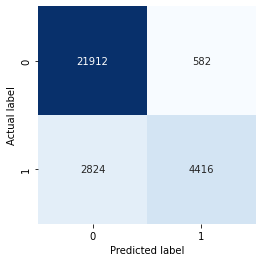

In [41]:
matrix = confusion_matrix(y_test,y_pred)

labels = [0, 1]

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Classification Report: ")
print(report)

print("Confusion Matrix: ")
print(matrix)

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ", f1)
print('Time taken: ', datetime.now()-start)

In [42]:
# Evaluate performance on the training set
y_train_pred = model.predict(X_train_norm)
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate performance on the test set
y_test_pred = model.predict(X_test_norm)
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the performance metrics
print("Training accuracy: ", train_acc)
print("Training precision: ", train_prec)
print("Training recall: ", train_rec)
print("Training f1: ", train_f1)
print("Test accuracy: ", test_acc)
print("Test precision: ", test_prec)
print("Test recall: ", test_rec)
print("Test f1: ", test_f1)

Training accuracy:  0.9153242079773997
Training precision:  0.948445475638051
Training recall:  0.695227728834314
Training f1:  0.8023317435082141
Test accuracy:  0.8854509988565279
Test precision:  0.8835534213685474
Test recall:  0.6099447513812155
Test f1:  0.721686550089884


## XGBoost With Hyperparameter Tuning

In [43]:
# Define the parameter grid to search
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 500],
    'gamma': [0, 1, 5],
}

# Create an XGBoost model
xgb_model = XGBClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(
    xgb_model,
    param_grid=params,
    cv=5,
    n_jobs=-1,
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_norm, y_train)

# Evaluate the fine-tuned classifier on the testing data
y_pred = grid_search.predict(X_test_norm)

# Print the best parameters and the corresponding score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}
Best score: 0.8935393876553747


Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     22494
           1       0.89      0.65      0.75      7240

    accuracy                           0.90     29734
   macro avg       0.90      0.81      0.84     29734
weighted avg       0.90      0.90      0.89     29734

Confusion Matrix: 
[[21928   566]
 [ 2515  4725]]
Accuracy:  0.8963812470572409
Precision:  0.8930258930258931
Recall:  0.6526243093922652
F1:  0.7541297581996648
Time taken:  4:59:16.125315


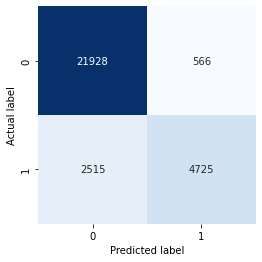

In [44]:
# generate classification report

matrix = confusion_matrix(y_test,y_pred)

labels = [0, 1]

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Classification Report: ")
print(report)

print("Confusion Matrix: ")
print(matrix)

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ", f1)
print('Time taken: ', datetime.now()-start)

In [45]:
# Evaluate performance on the training set
y_train_pred = grid_search.predict(X_train_norm)
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate performance on the test set
y_test_pred = grid_search.predict(X_test_norm)
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the performance metrics
print("Training accuracy: ", train_acc)
print("Training precision: ", train_prec)
print("Training recall: ", train_rec)
print("Training f1: ", train_f1)
print("Test accuracy: ", test_acc)
print("Test precision: ", test_prec)
print("Test recall: ", test_rec)
print("Test f1: ", test_f1)

Training accuracy:  0.9539247998923791
Training precision:  0.9825686962837429
Training recall:  0.8282934793700466
Training f1:  0.8988593998006718
Test accuracy:  0.8963812470572409
Test precision:  0.8930258930258931
Test recall:  0.6526243093922652
Test f1:  0.7541297581996648


## Ensemble Method - Stacking

In [46]:
clf1 = LogisticRegression()
clf2 = GaussianNB()
clf3 = SVC()
clf4 = RandomForestClassifier()
clf5 = MLPClassifier()

# Create the stacking classifier
estimators = [('lr', clf1), ('nb', clf2), ('svm', clf3), ('rf', clf4), ('nn', clf5)]
clf_stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
 
# Train the stacking classifier
clf_stack.fit(X_train_norm, y_train)

# Evaluate the stacking classifier on the testing data
y_pred = clf_stack.predict(X_test_norm)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ", f1)
print('Time taken: ', datetime.now()-start)

Accuracy:  0.9505952781327773
Precision:  0.9046417052306829
Recall:  0.8910220994475138
F1:  0.8977802518961797
Time taken:  5:37:08.686282


In [47]:
y_pred = clf_stack.predict(X_train_norm)
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ", f1)
print('Time taken: ', datetime.now()-start)

Accuracy:  0.9696811730678684
Precision:  0.9391792950791759
Recall:  0.93809313241947
F1:  0.9386358995303247
Time taken:  5:42:07.231439


# FUTURE WORK

## Ensemble Method - Boosting

### Logistic Regression 

In [48]:
logreg = LogisticRegression(random_state=42)
model = AdaBoostClassifier(base_estimator=logreg,n_estimators=50,learning_rate=0.1, random_state=42)

#Fit the training feature Xs and training label Ys
model.fit(X_train_norm, y_train)

#Use the trained model to predict the test data
predictions = model.predict(X_test_norm)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10)


,Actual,Predicted
11547,0,0
31670,1,1
41241,0,0
62488,0,0
102886,0,0
46391,0,0
121262,0,0
13183,0,0
123828,1,0
4346,1,0


Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     22494
           1       0.95      0.45      0.61      7240

    accuracy                           0.86     29734
   macro avg       0.90      0.72      0.77     29734
weighted avg       0.88      0.86      0.84     29734

Confusion Matrix: 
[[22336   158]
 [ 3955  3285]]
Accuracy:  0.8616735050783615
Precision:  0.9541097879756026
Recall:  0.4537292817679558
F1:  0.6149957877000842
Time taken:  5:42:11.757787


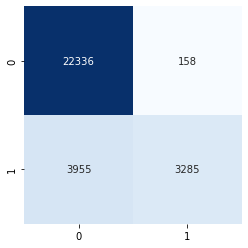

In [49]:
matrix = confusion_matrix(y_test,predictions)

labels = [0, 1]

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

report = classification_report(y_test,predictions)
accuracy = accuracy_score(y_test,predictions)
precision = precision_score(y_test,predictions)
recall = recall_score(y_test,predictions)
f1 = f1_score(y_test,predictions)

print("Classification Report: ")
print(report)

print("Confusion Matrix: ")
print(matrix)

print("Accuracy: ", accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ",f1)
print('Time taken: ', datetime.now()-start)

### Naive Bayes 

In [50]:
naive_bayes = GaussianNB()

model = AdaBoostClassifier(base_estimator=naive_bayes, n_estimators=50, learning_rate=0.1, random_state=42)

#Fit the training feature Xs and training label Ys
model.fit(X_train_norm, y_train)

#Use the trained model to predict the test data
predictions = model.predict(X_test_norm)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10) 

,Actual,Predicted
256,0,0
2104,0,0
120826,0,0
88714,0,0
33905,0,0
12808,0,0
88311,1,0
67069,1,1
35015,0,0
132008,0,0


Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     22494
           1       0.89      0.47      0.61      7240

    accuracy                           0.86     29734
   macro avg       0.87      0.73      0.76     29734
weighted avg       0.86      0.86      0.84     29734

Confusion Matrix: 
[[22068   426]
 [ 3836  3404]]
Accuracy:  0.8566624066724962
Precision:  0.8887728459530027
Recall:  0.47016574585635357
F1:  0.6149954832881662
Time taken:  5:42:18.297638


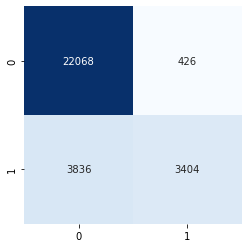

In [51]:
nb_confusion_matrix = confusion_matrix(y_test,predictions)

labels = [0, 1]

sns.heatmap(nb_confusion_matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

nb_classification_report = classification_report(y_test,predictions)
nb_accuracy = accuracy_score(y_test,predictions)
nb_precision = precision_score(y_test,predictions)
nb_recall = recall_score(y_test,predictions)
nb_f1 = f1_score(y_test,predictions)

print("Classification Report: ")
print(nb_classification_report)

print("Confusion Matrix: ")
print(nb_confusion_matrix)

print("Accuracy: ", nb_accuracy)
print("Precision: ",nb_precision)
print("Recall: ",nb_recall)
print("F1: ",nb_f1)
print('Time taken: ', datetime.now()-start)

### Support Vector Machine 

In [52]:
svm = LinearSVC(random_state=42)
model = AdaBoostClassifier(n_estimators=50,learning_rate=0.1, base_estimator=svm,algorithm='SAMME', random_state=42)

model.fit(X_train_norm, y_train)
predictions = model.predict(X_test_norm)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10)

,Actual,Predicted
131187,1,0
144436,0,0
91737,1,0
113115,0,1
41186,0,0
105807,0,0
29489,0,0
41359,1,1
14278,0,0
12604,0,0


Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     22494
           1       0.81      0.50      0.62      7240

    accuracy                           0.85     29734
   macro avg       0.83      0.73      0.76     29734
weighted avg       0.85      0.85      0.84     29734

Confusion Matrix: 
[[21616   878]
 [ 3586  3654]]
Accuracy:  0.8498688370215914
Precision:  0.8062665489849956
Recall:  0.5046961325966851
F1:  0.6207951070336392
Time taken:  5:42:37.720494


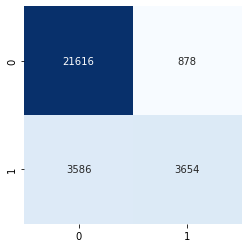

In [53]:
svm_confusion_matrix = confusion_matrix(y_test,predictions)

labels = [0, 1]

sns.heatmap(svm_confusion_matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

svm_classification_report = classification_report(y_test,predictions)
svm_accuracy = accuracy_score(y_test,predictions)
svm_precision = precision_score(y_test,predictions)
svm_recall = recall_score(y_test,predictions)
svm_f1 = f1_score(y_test,predictions)

print("Classification Report: ")
print(svm_classification_report)

print("Confusion Matrix: ")
print(svm_confusion_matrix)

print("Accuracy: ", svm_accuracy)
print("Precision: ",svm_precision)
print("Recall: ",svm_recall)
print("F1: ",svm_f1)
print('Time taken: ', datetime.now()-start)

### Decision Tree (Hyperparameter Tuning)

In [54]:
# dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
model = AdaBoostClassifier(base_estimator=best_model_dt, n_estimators=50,learning_rate=0.1, random_state=42)

#Fit the training feature Xs and training label Ys
model.fit(X_train_norm, y_train)

#Use the trained model to predict the test data
predictions = model.predict(X_test_norm)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10)


,Actual,Predicted
38775,0,0
25175,1,1
43308,0,0
80027,0,0
116733,0,0
95216,0,0
93306,0,0
7823,0,0
61057,1,1
80897,1,1


Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     22494
           1       0.90      0.54      0.68      7240

    accuracy                           0.87     29734
   macro avg       0.89      0.76      0.80     29734
weighted avg       0.88      0.87      0.86     29734

Confusion Matrix: 
[[22076   418]
 [ 3335  3905]]
Accuracy:  0.8737808569314589
Precision:  0.9033078880407125
Recall:  0.539364640883978
F1:  0.675430251664793
Time taken:  5:45:25.303215


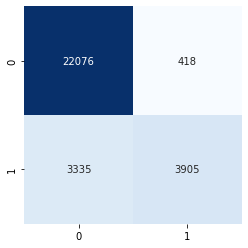

In [55]:
dt_confusion_matrix = confusion_matrix(y_test,predictions)

labels = [0, 1]

sns.heatmap(dt_confusion_matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

dt_classification_report = classification_report(y_test,predictions)
dt_accuracy = accuracy_score(y_test,predictions)
dt_precision = precision_score(y_test,predictions)
dt_recall = recall_score(y_test,predictions)
dt_f1 = f1_score(y_test,predictions)

print("Classification Report: ")
print(dt_classification_report)

print("Confusion Matrix: ")
print(dt_confusion_matrix)

print("Accuracy: ", dt_accuracy)
print("Precision: ",dt_precision)
print("Recall: ",dt_recall)
print("F1: ",dt_f1)
print('Time taken: ', datetime.now()-start)

### Random Forest (Hyperparameter Tuning)

In [12]:
abc = AdaBoostClassifier(base_estimator=best_model_rf, n_estimators=50, learning_rate=0.1,algorithm = "SAMME", random_state=42)

abc.fit(X_train_norm, y_train)

predictions = abc.predict(X_test_norm)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10)

,Actual,Predicted
29528,0,0
37961,1,1
60725,0,0
88763,0,0
87666,1,0
108175,0,0
3701,0,0
87689,0,0
19336,1,0
16011,0,0


Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     22494
           1       0.86      0.62      0.72      7240

    accuracy                           0.88     29734
   macro avg       0.88      0.79      0.82     29734
weighted avg       0.88      0.88      0.88     29734

Confusion Matrix: 
[[21787   707]
 [ 2743  4497]]
Accuracy:  0.883971211407816
Precision:  0.8641429669485011
Recall:  0.6211325966850829
F1:  0.7227579556412729
Time taken:  0:33:24.451681


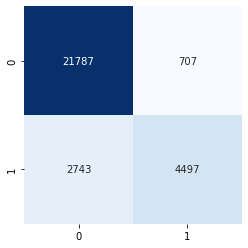

In [13]:
rf_confusion_matrix = confusion_matrix(y_test,predictions)

labels = [0, 1]

sns.heatmap(rf_confusion_matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

rf_classification_report = classification_report(y_test,predictions)
rf_accuracy = accuracy_score(y_test,predictions)
rf_precision = precision_score(y_test,predictions)
rf_recall = recall_score(y_test,predictions)
rf_f1 = f1_score(y_test,predictions)

print("Classification Report: ")
print(rf_classification_report)

print("Confusion Matrix: ")
print(rf_confusion_matrix)

print("Accuracy: ", rf_accuracy)
print("Precision: ",rf_precision)
print("Recall: ",rf_recall)
print("F1: ",rf_f1)
print('Time taken: ', datetime.now()-start)

## Ensemble Method - Bagging

### Logistic Regression

In [57]:
logreg = LogisticRegression(random_state=42)
bag_model = BaggingClassifier(base_estimator=logreg, n_estimators=50, bootstrap=True,oob_score=True,random_state=42)

bag_model.fit(X_train_norm, y_train)

predictions = bag_model.predict(X_test_norm)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10)

,Actual,Predicted
52339,1,1
120191,0,0
79371,0,0
51858,0,0
108887,0,0
20206,0,0
20772,0,0
134124,0,0
123727,0,0
131818,0,0


Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     22494
           1       0.91      0.47      0.62      7240

    accuracy                           0.86     29734
   macro avg       0.88      0.73      0.77     29734
weighted avg       0.87      0.86      0.84     29734

Confusion Matrix: 
[[22164   330]
 [ 3851  3389]]
Accuracy:  0.8593865608394431
Precision:  0.9112664694810433
Recall:  0.4680939226519337
F1:  0.6184870882379779
Time taken:  6:12:27.022145


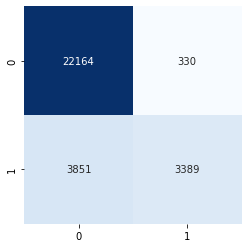

In [58]:
matrix = confusion_matrix(y_test,predictions)

labels = [0, 1]

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

report = classification_report(y_test,predictions)
accuracy = accuracy_score(y_test,predictions)
precision = precision_score(y_test,predictions)
recall = recall_score(y_test,predictions)
f1 = f1_score(y_test,predictions)

print("Classification Report: ")
print(report)

print("Confusion Matrix: ")
print(matrix)

print("Accuracy: ", accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ",f1)
print('Time taken: ', datetime.now()-start)

### Naive Bayes 

In [59]:
naive_bayes = GaussianNB()
bag_model = BaggingClassifier(base_estimator=naive_bayes, n_estimators=50, bootstrap=True,oob_score=True,random_state=42)

bag_model.fit(X_train_norm, y_train)

predictions = bag_model.predict(X_test_norm)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10)


,Actual,Predicted
44145,0,0
116437,0,0
110792,0,0
67006,0,0
69216,0,0
55688,0,0
88937,0,1
64241,0,0
95218,0,0
42152,1,1


Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     22494
           1       0.71      0.45      0.55      7240

    accuracy                           0.82     29734
   macro avg       0.78      0.69      0.72     29734
weighted avg       0.81      0.82      0.81     29734

Confusion Matrix: 
[[21191  1303]
 [ 4009  3231]]
Accuracy:  0.8213492971009618
Precision:  0.7126157917953242
Recall:  0.4462707182320442
F1:  0.5488364192288092
Time taken:  6:12:31.957389


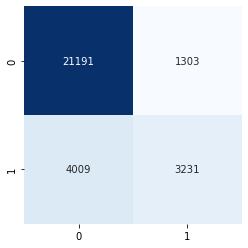

In [60]:
nb_confusion_matrix = confusion_matrix(y_test,predictions)

labels = [0, 1]

sns.heatmap(nb_confusion_matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

nb_classification_report = classification_report(y_test,predictions)
nb_accuracy = accuracy_score(y_test,predictions)
nb_precision = precision_score(y_test,predictions)
nb_recall = recall_score(y_test,predictions)
nb_f1 = f1_score(y_test,predictions)

print("Classification Report: ")
print(nb_classification_report)

print("Confusion Matrix: ")
print(nb_confusion_matrix)

print("Accuracy: ", nb_accuracy)
print("Precision: ",nb_precision)
print("Recall: ",nb_recall)
print("F1: ",nb_f1)
print('Time taken: ', datetime.now()-start)

### Support Vector Machine 

In [20]:
bag_model = BaggingClassifier(base_estimator=svm, n_estimators=50, bootstrap=True,oob_score=True,random_state=42)

bag_model.fit(X_train_norm, y_train)


predictions = bag_model.predict(X_test_norm)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10)

,Actual,Predicted
76746,0,0
81359,0,0
54228,0,0
145161,0,0
77587,1,0
110060,0,0
93551,0,0
101801,1,1
87550,0,0
18104,0,0


Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     22494
           1       0.93      0.46      0.62      7240

    accuracy                           0.86     29734
   macro avg       0.89      0.72      0.77     29734
weighted avg       0.87      0.86      0.84     29734

Confusion Matrix: 
[[22247   247]
 [ 3910  3330]]
Accuracy:  0.8601937176296496
Precision:  0.9309477215543752
Recall:  0.4599447513812155
F1:  0.6156975131737081
Time taken:  1:15:37.464193


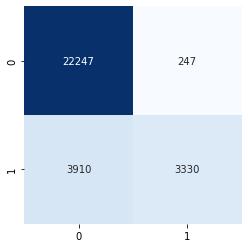

In [21]:
svm_confusion_matrix = confusion_matrix(y_test,predictions)

labels = [0, 1]

sns.heatmap(svm_confusion_matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

svm_classification_report = classification_report(y_test,predictions)
svm_accuracy = accuracy_score(y_test,predictions)
svm_precision = precision_score(y_test,predictions)
svm_recall = recall_score(y_test,predictions)
svm_f1 = f1_score(y_test,predictions)

print("Classification Report: ")
print(svm_classification_report)

print("Confusion Matrix: ")
print(svm_confusion_matrix)

print("Accuracy: ", svm_accuracy)
print("Precision: ",svm_precision)
print("Recall: ",svm_recall)
print("F1: ",svm_f1)
print('Time taken: ', datetime.now()-start)

### Decision Tree 

In [62]:
model = BaggingClassifier(base_estimator=best_model_dt,n_estimators=50, bootstrap=True,oob_score=True,random_state=42)

# Fit the training feature Xs and training label Ys
model.fit(X_train_norm, y_train)

# Use the trained model to predict the test data
predictions = model.predict(X_test_norm)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10)

,Actual,Predicted
116515,0,0
144367,1,1
85433,0,0
18106,0,0
111543,1,0
51904,0,0
63916,0,0
117238,0,0
60758,0,0
137918,0,0


Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     22494
           1       0.95      0.43      0.59      7240

    accuracy                           0.86     29734
   macro avg       0.90      0.71      0.75     29734
weighted avg       0.87      0.86      0.83     29734

Confusion Matrix: 
[[22325   169]
 [ 4112  3128]]
Accuracy:  0.856023407546916
Precision:  0.9487412799514711
Recall:  0.4320441988950276
F1:  0.5937173768624846
Time taken:  6:24:52.325254


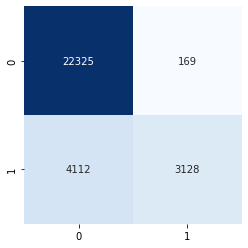

In [63]:
dt_confusion_matrix = confusion_matrix(y_test,predictions)

labels = [0, 1]

sns.heatmap(dt_confusion_matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

dt_classification_report = classification_report(y_test,predictions)
dt_accuracy = accuracy_score(y_test,predictions)
dt_precision = precision_score(y_test,predictions)
dt_recall = recall_score(y_test,predictions)
dt_f1 = f1_score(y_test,predictions)

print("Classification Report: ")
print(dt_classification_report)

print("Confusion Matrix: ")
print(dt_confusion_matrix)

print("Accuracy: ", dt_accuracy)
print("Precision: ",dt_precision)
print("Recall: ",dt_recall)
print("F1: ",dt_f1)
print('Time taken: ', datetime.now()-start)

### Random Forest

In [22]:
bag_model = BaggingClassifier(base_estimator=best_model_rf, n_estimators=50, bootstrap=True,oob_score=True,random_state=42)
 
bag_model.fit(X_train_norm, y_train)

predictions = bag_model.predict(X_test_norm)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10)

,Actual,Predicted
70522,1,0
101458,0,0
66456,0,0
92100,0,0
84226,0,0
88878,0,0
19161,1,0
31200,0,0
71475,1,1
107703,0,0


Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     22494
           1       0.96      0.44      0.61      7240

    accuracy                           0.86     29734
   macro avg       0.91      0.72      0.76     29734
weighted avg       0.88      0.86      0.84     29734

Confusion Matrix: 
[[22374   120]
 [ 4020  3220]]
Accuracy:  0.8607654536893792
Precision:  0.9640718562874252
Recall:  0.4447513812154696
F1:  0.6086956521739131
Time taken:  2:15:11.932976


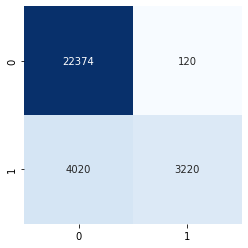

In [23]:
rf_confusion_matrix = confusion_matrix(y_test,predictions)

labels = [0, 1]

sns.heatmap(rf_confusion_matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

rf_classification_report = classification_report(y_test,predictions)
rf_accuracy = accuracy_score(y_test,predictions)
rf_precision = precision_score(y_test,predictions)
rf_recall = recall_score(y_test,predictions)
rf_f1 = f1_score(y_test,predictions)

print("Classification Report: ")
print(rf_classification_report)

print("Confusion Matrix: ")
print(rf_confusion_matrix)

print("Accuracy: ", rf_accuracy)
print("Precision: ",rf_precision)
print("Recall: ",rf_recall)
print("F1: ",rf_f1)
print('Time taken: ', datetime.now()-start)